In [1]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
pdf_folder = "../data/DSA/Der_blaue_Bruder"
#pdf_folder = "../data/DSA/Adel_Recht_und_Edelmut"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Die Datei _combined.pdf existiert bereits unter folgendem Pfad: ../data/DSA/Der_blaue_Bruder/_combined.pdf
Lade die Datei lokal..



2025-12-19 18:29:16,064 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-19 18:29:16,114 - INFO - Going to convert document batch...
2025-12-19 18:29:16,115 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-12-19 18:29:16,120 - INFO - Loading plugin 'docling_defaults'
2025-12-19 18:29:16,122 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-19 18:29:16,127 - INFO - Loading plugin 'docling_defaults'
2025-12-19 18:29:16,130 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-19 18:29:16,131 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-12-19 18:29:16,131 - INFO - easyocr cannot be used because it is not installed.
2025-12-19 18:29:16,281 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-12-19 18:29:16,289 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-12-19 18:29:16,300 [RapidOCR] download_file.py:60: 


Anzahl Layout-Spans: 1833


In [2]:
from pipeline_preproc_pdf import process_doc_into_posts 

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine 

In [5]:
#Typische DSA-Wörter Pseudonymisieren, zur besseren Identifikation später
from rapidfuzz import fuzz
from nltk.tokenize import word_tokenize
from pathlib import Path

#print(posts[0])
#words = word_tokenize(posts[0], language="german")
#print(words)

for o, post in enumerate(posts): #Iterieren durch alle Posts
    print("Verarbeite Post",o+1,"von",len(posts), end='\r')
    #print_percent_done(o+1,len(posts))
    words = word_tokenize(post, language="german")
    for txt_file in Path("/home/timc/Workspace/nlp-rpg-narratives/").glob("*.txt"): #Iteriere durch alle Text-Files
        txt_file_tokens = str(txt_file).split("/")
        txt_name = txt_file_tokens[-1]
        txt_pseud = txt_name[:-4] #Nutzen den jeweiligen Namen des Text-Files als Pseudonym
        with open(txt_file, "r", encoding="utf-8") as f:
            names = [line.strip() for line in f if line.strip()]
            for name in names: #Iterieren durch alle Namen im jeweiligen Text-File
                for i, word in enumerate(words): #Iterieren durch alle Wörter aus dem jeweiligen Post
                    erg = fuzz.ratio(word, name)
                    if erg > 90.0:
                        words[i] = txt_pseud
                        #print(name,word,txt_pseud)
    posts[o] = ' '.join(words) #Ersetze alten Post in der Liste durch den neuen pseudonymisierten

#print("-----------------------------------------------------------")
#print(words)
#posts[0] = ' '.join(words)
#print(posts[0])


In [6]:
from pipeline_preproc_lemma import TextPreprocessingPipeline #Posts von Satzzeichen und Ziffern bereinigen & anschließend lemmatisieren 

pipeline = TextPreprocessingPipeline()
posts_clean = pipeline.process_posts(posts, debug=False) #debug für print-Ausgaben der Zwischenschritte

#Posts ausgeben
for i, p in enumerate(posts_clean):
    print(f"--- Post {i+1} ---\n{p}\n")

Lade spaCy-Modell ...
--- Post 1 ---
der grafschaft dsa_names zwischen dsa_names und dsa_names sein einer der arm und wilde region dsa_names sie werden von zahlreich dicht und gefährlich wäldern mit harpyi ork und dsa_names urwüchsigen weisen sowie von heide und moorlandschaft prägen neben ein wenig kornwirtschaft betreiben der leute vor alle kohl und rübenanbau sowie viehwirtschaft vor alle schaf und ziegen einzig ausnahme in der ganz ärmlichkeit sein der baronie dsa_stadtnames mit der gleichnamig stadt der durch der dort vorhanden salzvorkomme zu reichtum kommen sein dsa_stadtnames bilden der wirtschaftlich und kulturell zentrum der grafschaft liegen an wichtig handelsweg norrnstieg alt weg alt straße richten zweimal in jahr der groß wollmarkt aus und sein durch der fest dsa_stadtnames ganz gut schützen an dsa_names der jahr bf zu zeit der zweiter wollmarkt leben in dsa_stadtnames um der einwohner man finden dort tempel von dsa_names dsa_names dsa_names und dsa_names sowie diverser g

## EXKURS - START

In [9]:
from pipeline_pos_verbs import VerbExtractionPipeline #pos-tagging

pipeline = VerbExtractionPipeline()

verb_only_posts = pipeline.process_posts(posts_clean, debug=False)

#Posts ausgeben
for i, p in enumerate(verb_only_posts):
    print(f"--- Post {i+1} ---\n{p}\n")


Lade spaCy-Modell für Verbextraktion ...
--- Post 1 ---
werden wäldern weisen prägen betreiben sein salzvorkomme kommen sein bilden liegen wollmarkt schützen wollmarkt leben finden ziehen haben treiben paktieren aufspürt verfolgt verlor überlegen bleiben schaden können sein abschließen haben schauen brauchen kommen erinnern erreichen sein sollen machen sein erklären führen eintraf

--- Post 2 ---
kleiden ledern machen werden sein stehen werden verstehen leben können sein sein gehen lassen geben haben verblichen sein erkennen kehren schauen antrifft werden fragen suchen essen werden lauschen hören suchen

--- Post 3 ---
haben freuen kennen können schaden lenken reiten rüsten bleiben

--- Post 4 ---
verlieren wirken haben finden kehren haben gewöhnen geben sein halten räuspern verschaffen suchen

--- Post 5 ---
besucht duften wollmarkt sein scheinen angegraut führen finden aufnimmt scheinen stühlen geben

--- Post 6 ---
erreichen sein wehranlage graben haben ausgestattet kapelle sein fin

## EXKURS - ENDE

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(posts_clean) #posts_clean

In [12]:
import nltk 
nltk.download('stopwords') #Abfrage einbauen, ob stopwords bereits heruntergeladen wurden
from nltk.corpus import stopwords #Import der Stopwords aus NLTK

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["bf", "peraine", "bolgrim", "aleezikiel", "verfasst", "mordred", "dsa_names", "dsa_dnames", "dsa_gnames", "dsa_stadtnames"] #weitere Stopwords ergänzen
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(verb_only_posts) #TF-IDF-Matrix erstellen


['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import pandas as pd

words = tfidf.get_feature_names_out() #Wortliste aus dem Vokabular der TF-IDF-Matrix
df = pd.DataFrame(result.toarray(), columns=words) #DataFrame aus der TF-IDF-Matrix erstellen
print(df)

     abfüllt  abgeben  abhalten  ablegen  ablehnen  ablenken  abnehmen  \
0        0.0      0.0       0.0      0.0       0.0       0.0       0.0   
1        0.0      0.0       0.0      0.0       0.0       0.0       0.0   
2        0.0      0.0       0.0      0.0       0.0       0.0       0.0   
3        0.0      0.0       0.0      0.0       0.0       0.0       0.0   
4        0.0      0.0       0.0      0.0       0.0       0.0       0.0   
..       ...      ...       ...      ...       ...       ...       ...   
354      0.0      0.0       0.0      0.0       0.0       0.0       0.0   
355      0.0      0.0       0.0      0.0       0.0       0.0       0.0   
356      0.0      0.0       0.0      0.0       0.0       0.0       0.0   
357      0.0      0.0       0.0      0.0       0.0       0.0       0.0   
358      0.0      0.0       0.0      0.0       0.0       0.0       0.0   

     abschließen  absehen  abteilen  ...  überlegen  überlässen  übermannt  \
0       0.175315      0.0       0

In [14]:
#Wichtigste Wörter pro Post ausgeben
for i, doc in enumerate(verb_only_posts):
    print(f"\n--- Wichtigste Wörter in Post {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))



--- Wichtigste Wörter in Post 1 ---
wollmarkt    0.368972
kommen       0.212347
wäldern      0.197411
verlor       0.197411
betreiben    0.197411
verfolgt     0.197411
treiben      0.197411
Name: 0, dtype: float64

--- Wichtigste Wörter in Post 2 ---
suchen        0.413927
verblichen    0.285574
antrifft      0.285574
ledern        0.285574
kleiden       0.266877
kehren        0.253611
lauschen      0.253611
Name: 1, dtype: float64

--- Wichtigste Wörter in Post 3 ---
lenken     0.424653
rüsten     0.424653
reiten     0.396850
freuen     0.396850
schaden    0.361823
kennen     0.329595
bleiben    0.291222
Name: 2, dtype: float64

--- Wichtigste Wörter in Post 4 ---
räuspern       0.402375
verschaffen    0.376031
verlieren      0.357339
gewöhnen       0.357339
kehren         0.357339
suchen         0.291613
finden         0.263329
Name: 3, dtype: float64

--- Wichtigste Wörter in Post 5 ---
scheinen     0.428892
aufnimmt     0.354090
besucht      0.354090
stühlen      0.330907
angegrau

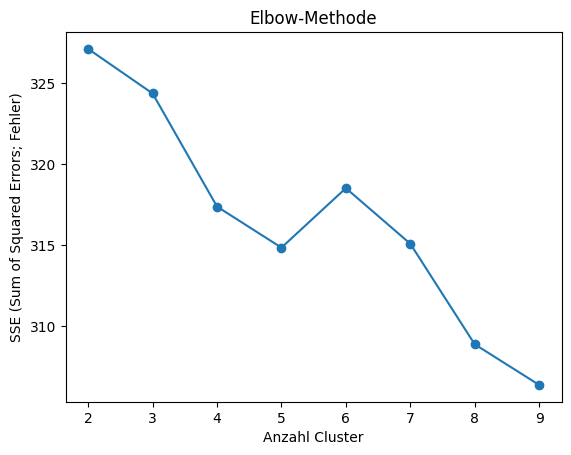

In [15]:
#Wie viele Cluster sind sinnvoll? (Elbow-Methode)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 10)  # teste 2-9 Cluster

for k in K:
    km = KMeans(n_clusters=k, random_state=42) #Initialisiere KMeans
    km.fit(result) #Fitte KMeans auf die TF-IDF-Matrix
    sse.append(km.inertia_) #SSE (Sum of Squared Errors) speichern

plt.plot(K, sse, '-o') #Elbow-Kurve plotten
plt.xlabel("Anzahl Cluster")
plt.ylabel("SSE (Sum of Squared Errors; Fehler)")
plt.title("Elbow-Methode")
plt.show()

In [16]:
#Clustering mittels k-means
from sklearn.cluster import KMeans

#KMeans Clustering
k = 6  # Anzahl Cluster
model = KMeans(n_clusters=k, random_state=42) #Initialisiere KMeans
model.fit(result) #Fitte KMeans auf die TF-IDF-Matrix

#Cluster-Zuordnung pro Dokument
labels = model.labels_

for i, (doc, label) in enumerate(zip(verb_only_posts, labels)):
    print(f"[Cluster {label}] {doc}")

[Cluster 5] werden wäldern weisen prägen betreiben sein salzvorkomme kommen sein bilden liegen wollmarkt schützen wollmarkt leben finden ziehen haben treiben paktieren aufspürt verfolgt verlor überlegen bleiben schaden können sein abschließen haben schauen brauchen kommen erinnern erreichen sein sollen machen sein erklären führen eintraf
[Cluster 5] kleiden ledern machen werden sein stehen werden verstehen leben können sein sein gehen lassen geben haben verblichen sein erkennen kehren schauen antrifft werden fragen suchen essen werden lauschen hören suchen
[Cluster 5] haben freuen kennen können schaden lenken reiten rüsten bleiben
[Cluster 5] verlieren wirken haben finden kehren haben gewöhnen geben sein halten räuspern verschaffen suchen
[Cluster 5] besucht duften wollmarkt sein scheinen angegraut führen finden aufnimmt scheinen stühlen geben
[Cluster 5] erreichen sein wehranlage graben haben ausgestattet kapelle sein finden geben stühlen sein führen erwarten leudane schauen nickt füh

In [19]:
#Welche Wörter charakterisieren jedes Cluster?
import numpy as np

words = tfidf.get_feature_names_out()
centers = model.cluster_centers_

for i in range(k):
    print(f"\nTop-Wörter Cluster {i}:")
    top_indices = centers[i].argsort()[::-1][:10]  #10 wichtigste Wörter
    print([words[idx] for idx in top_indices])


Top-Wörter Cluster 0:
['entlassen', 'sprechen', 'wissen', 'überreicht', 'ignorieren', 'behandeln', 'wahren', 'auseinandergenommen', 'enden', 'ausgehen']

Top-Wörter Cluster 1:
['sollten', 'schmunzeln', 'klingen', 'bringen', 'stehen', 'sprechen', 'sollen', 'gehen', 'festsetzen', 'festhalten']

Top-Wörter Cluster 2:
['lesen', 'verschließen', 'siegeln', 'ohren', 'untertrieben', 'lehnen', 'leudane', 'reichen', 'beantworten', 'verabschieden']

Top-Wörter Cluster 3:
['schauen', 'wenden', 'gehen', 'nickt', 'stellen', 'nachdenken', 'ergreifen', 'schütteln', 'gehören', 'reagieren']

Top-Wörter Cluster 4:
['einwilligen', 'aufzuschließen', 'bezahlen', 'nickt', 'finden', 'finde', 'feststellen', 'festsetzen', 'festhalten', 'feqzen']

Top-Wörter Cluster 5:
['nickt', 'gehen', 'geben', 'kommen', 'schauen', 'sehen', 'fragen', 'halten', 'nehmen', 'hören']


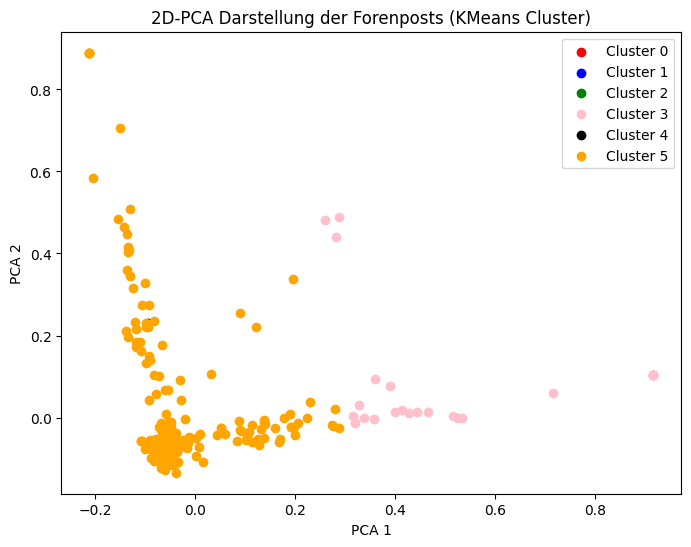

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

# Cluster-Farben
colors = ['red', 'blue', 'green', 'pink', 'black', 'orange', 'grey'] #, 'black', 'orange', 'grey'

plt.figure(figsize=(8, 6))
for i in range(k):
    points = tfidf_2d[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("2D-PCA Darstellung der Forenposts (KMeans Cluster)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


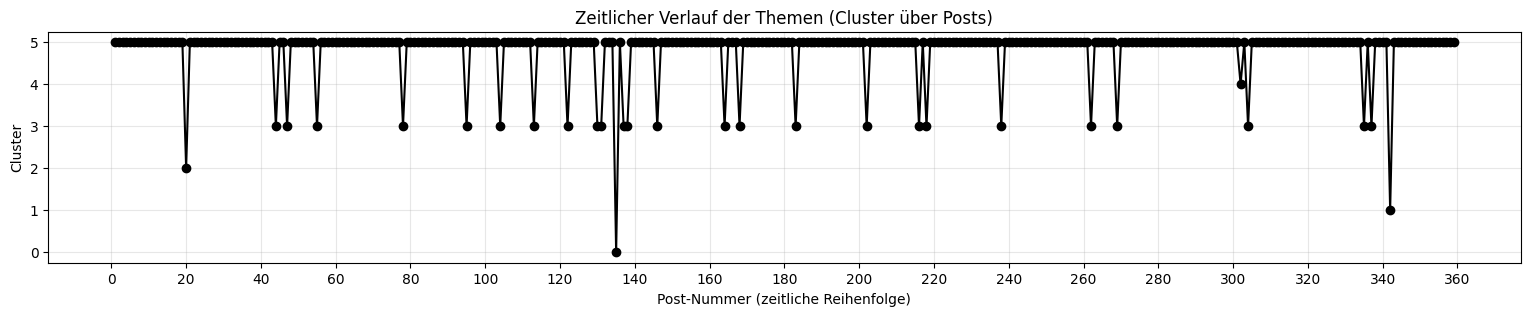

In [21]:
import matplotlib.ticker as ticker

plt.figure(figsize=(19, 3))
plt.plot(range(1, len(labels)+1), labels, marker='o', linestyle='-', color='black')

# Maximal 20 Ticks auf der X-Achse
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

plt.yticks(sorted(set(labels)))
plt.xlabel("Post-Nummer (zeitliche Reihenfolge)")
plt.ylabel("Cluster")
plt.title("Zeitlicher Verlauf der Themen (Cluster über Posts)")

plt.grid(True, alpha=0.3)
plt.show()


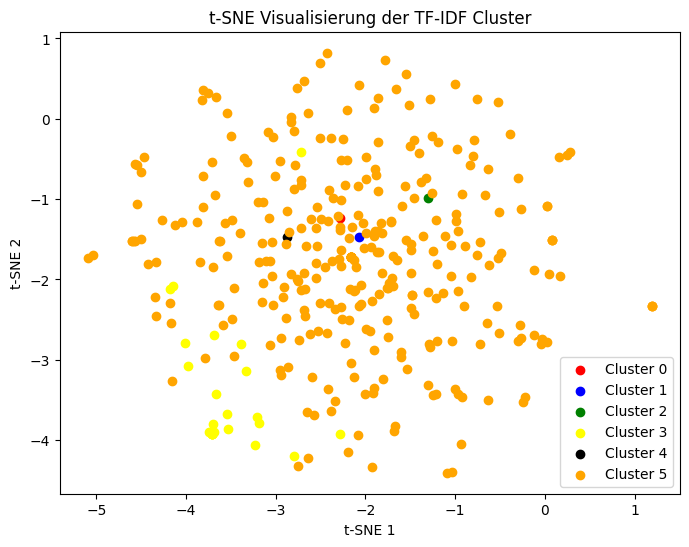

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE erzeugen (2 Dimensionen)
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
tfidf_tsne = tsne.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', "yellow", 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_tsne[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("t-SNE Visualisierung der TF-IDF Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


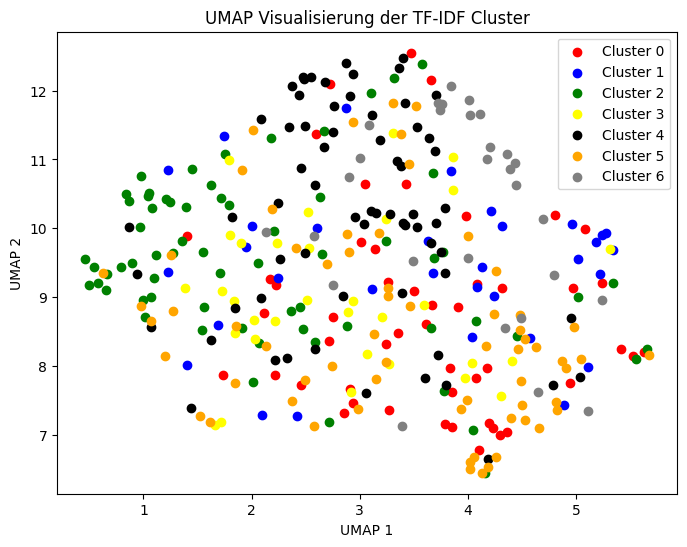

In [158]:
import umap
import matplotlib.pyplot as plt

# UMAP erzeugen
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_umap[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("UMAP Visualisierung der TF-IDF Cluster")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()


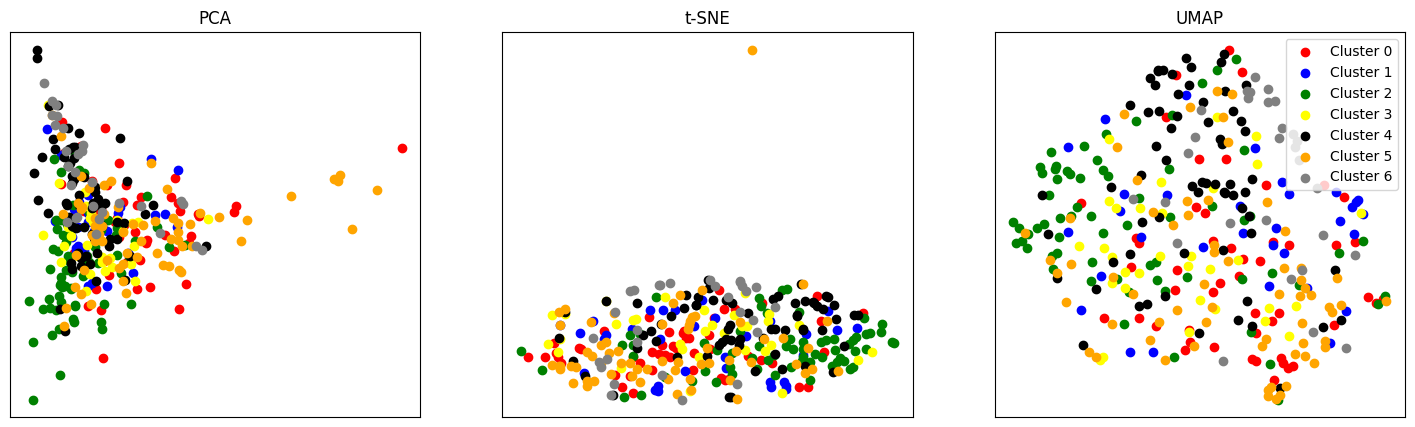

In [173]:
# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

methods = {
    "PCA": tfidf_2d,
    "t-SNE": tfidf_tsne,
    "UMAP": tfidf_umap
}

for ax, (name, emb) in zip(axs, methods.items()):
    for i in range(k):
        pts = emb[labels == i]
        ax.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


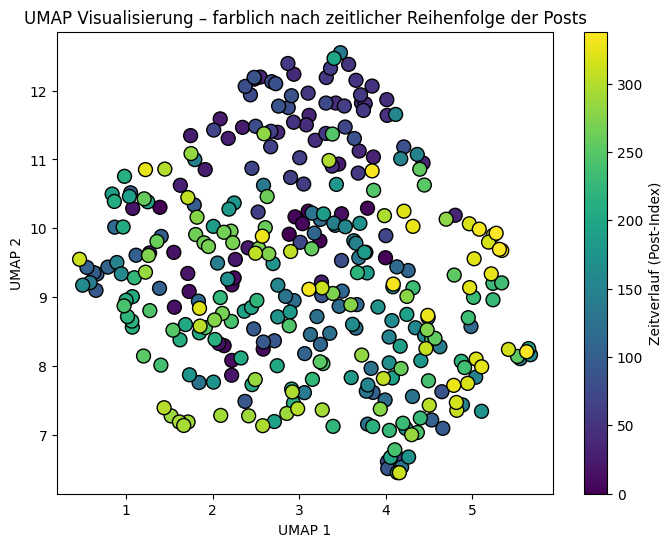

In [160]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# UMAP berechnen (2D)
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = einfach die Reihenfolge 0,1,2,... der Dokumente
time_index = np.arange(len(posts))

plt.figure(figsize=(8, 6))

# Scatterplot: Farbe = Zeitverlauf
scatter = plt.scatter(
    tfidf_umap[:, 0],
    tfidf_umap[:, 1],
    c=time_index,
    cmap="viridis",
    s=100,
    edgecolors='black'
)

plt.colorbar(scatter, label="Zeitverlauf (Post-Index)")
plt.title("UMAP Visualisierung – farblich nach zeitlicher Reihenfolge der Posts")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

plt.show()


In [166]:
import umap
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# ----------------------------
#  1. UMAP berechnen
# ----------------------------
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = Reihenfolge der Posts
time_index = np.arange(len(posts))

# ----------------------------
#  2. Animation vorbereiten
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Hintergrundpunkte anzeigen
ax.scatter(tfidf_umap[:, 0], tfidf_umap[:, 1], c='lightgray', s=50)

# Animierter Scatterplot (startet leer)
scatter = ax.scatter(
    [], [],
    c=[],                     # Farben werden dynamisch gesetzt
    cmap="viridis",
    s=120,
    edgecolors="black",
    vmin=time_index.min(),
    vmax=time_index.max()
)

ax.set_title("UMAP – Animierter zeitlicher Verlauf der Forenposts")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

# ----------------------------
#  3. Update-Funktion
# ----------------------------
def update(frame):
    # Werte bis zum aktuellen Frame anzeigen
    current_x = tfidf_umap[:frame+1, 0]
    current_y = tfidf_umap[:frame+1, 1]

    scatter.set_offsets(np.c_[current_x, current_y])
    scatter.set_array(time_index[:frame+1])  # Farben nach Zeitverlauf

    return scatter,

# ----------------------------
#  4. Animation erzeugen
# ----------------------------
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(posts),
    interval=800,
    repeat=False
)

# ----------------------------
#  5. Export als GIF
# ----------------------------
ani.save(
    "umap_timeline.gif",
    writer="imagemagick",
    dpi=120
)

# ----------------------------
#  6. Export als MP4
# ----------------------------
ani.save(
    "umap_timeline.mp4",
    writer="ffmpeg",
    fps=1   # 1 Frame pro Sekunde → 800ms wie Animation
)

plt.close(fig)   # Fenster schließen nach Export

print("GIF und MP4 erfolgreich gespeichert!")


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
2025-11-27 21:23:39,810 - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2025-11-27 21:23:39,811 - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2025-11-27 21:23:56,655 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-27 21:23:56,656 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 800x600 -pix_fmt rg

GIF und MP4 erfolgreich gespeichert!


_________________________

# tf-idf auf pos-tags

In [2]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
pdf_folder = "../data/DSA/Der_blaue_Bruder"
#pdf_folder = "../data/DSA/Die_Stadt_des_Feuers"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))

Die Datei _combined.pdf existiert bereits unter folgendem Pfad: ../data/DSA/Der_blaue_Bruder/_combined.pdf
Lade die Datei lokal..



2025-11-28 13:14:49,614 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-28 13:14:49,632 - INFO - Going to convert document batch...
2025-11-28 13:14:49,633 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-28 13:14:49,634 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-28 13:14:49,636 - INFO - easyocr cannot be used because it is not installed.
2025-11-28 13:14:49,638 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-28 13:14:49,650 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO


Anzahl Layout-Spans: 1833


In [3]:
from pipeline_preproc_pdf import process_doc_into_posts

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine 

In [4]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("de_core_news_lg")

reise_patterns = [
    # wanderte, wanderten, wanderst, wandert, etc.
    [{"LOWER": {"REGEX": "^wander"} , "POS": "VERB"}],

    # Lemma: reisen, ziehen, marschieren, durchqueren
    [{"LEMMA": {"IN": ["erreichen","reisen","ziehen","marschieren","durchqueren"]}, "POS": "VERB"}],

    # trennbares aufbrechen → brach ... auf
    [{"LEMMA": "brechen", "POS": "VERB"}, {"LOWER": "auf"}],

    # Nomen
    [{"LEMMA": {"IN": ["reise","weg","pfad","expedition","marsch"]}, "POS": "NOUN"}],
]

kampf_patterns = [
    [{"LEMMA": {"IN": ["kämpfen","angreifen","verteidigen","zuschlagen","stechen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["kampf","angriff","duell","schlacht","gegner","feind"]}, "POS": "NOUN"}]
]

ausruhen_patterns = [
    # ruhten
    [{"LEMMA": {"IN": ["ruhen","rasten","schlafen","lagern","entspannen"]}, "POS": "VERB"}],
    
    # ruhten ... aus  (trennbar!)
    [{"LEMMA": "ruhen"}, {"LOWER": "aus"}],

    # Nomen
    [{"LEMMA": {"IN": ["rast","pause","lager","ruhe","erholung"]}, "POS": "NOUN"}]
]

rettung_patterns = [
    [{"LEMMA": {"IN": ["retten","befreien","beschützen","opfern"]}, "POS": "VERB"}],
    [{"LOWER": {"IN": ["rettung","hilferuf","opfer","heldentat","gefahr","bedrohung"]}, "POS": "NOUN"}]
]

flucht_patterns = [
    # fliehen, entkommen, flüchten
    [{"LEMMA": {"IN": ["fliehen","entkommen","flüchten","verstecken"]}, "POS": "VERB"}],

    # trennbares wegrennen / rannte ... weg
    [{"LEMMA": "rennen", "POS": "VERB"}, {"LOWER": "weg"}],
    [{"LOWER": "weg"}, {"LEMMA": "rennen"}],

    [{"LEMMA": {"IN": ["flucht","unterschlupf","versteck","panik"]}, "POS": "NOUN"}]
]

training_patterns = [
    [{"LEMMA": {"IN": ["trainieren","üben","vorbereiten","meditieren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["training","übung","vorbereitung","lektion","technik"]}, "POS": "NOUN"}]
]

verfolgung_patterns = [
    [{"LEMMA": {"IN": ["verfolgen","jagen","suchen"]}, "POS": "VERB"}],
    [{"LEMMA": "spüren", "POS": "VERB"}, {"LOWER": "auf"}],
    [{"LEMMA": {"IN": ["verfolgung","jagd","spur","fährte"]}, "POS": "NOUN"}]
]

ruf_patterns = [
    [{"LEMMA": {"IN": ["rufen","einladen","beauftragen","verkünden","offenbaren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["ruf","auftrag","prophezeiung","vision","botschaft"]}, "POS": "NOUN"}]
]
belohnung_patterns = [
    [{"LEMMA": {"IN": ["belohnen","erkennen","verstehen","entdecken","gewinnen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["belohnung","schatz","erkenntnis","wahrheit","einsicht"]}, "POS": "NOUN"}]
]

categories = {
    "Reise": reise_patterns,
    "Kampf": kampf_patterns,
    "Ausruhen": ausruhen_patterns,
    "Rettung": rettung_patterns,
    "Flucht": flucht_patterns,
    "Training": training_patterns,
    "Verfolgung": verfolgung_patterns,
    "Ruf": ruf_patterns,
    "Belohnung": belohnung_patterns
}

# Matcher erstellen
matcher = Matcher(nlp.vocab)

# Patterns dem Matcher hinzufügen
for label, patterns in categories.items():
    matcher.add(label, patterns)

for post in posts:
    doc = nlp(post)
    matches = matcher(doc)
    #print(matches)

    # Ergebniscontainer
    category_hits = {c: [] for c in categories}

    # Treffer zuordnen
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        span = doc[start:end]
        category_hits[label].append(span.text)

    # Ausgabe
    for cat, hits in category_hits.items():
        if hits:
            print(f"{cat}: {hits}")


Reise: ['ziehen', 'erreichte']
Verfolgung: ['verfolgte']
Verfolgung: ['suchen', 'sucht']
Belohnung: ['verstehen', 'erkennen']
Verfolgung: ['suchte']
Reise: ['erreicht']
Reise: ['erreichen']
Reise: ['gereist']
Reise: ['reisen']
Ausruhen: ['entspannt']
Ruf: ['ruft']
Verfolgung: ['suchen']
Belohnung: ['versteht']
Belohnung: ['verstehen']
Belohnung: ['verstehen']
Reise: ['reise']
Ausruhen: ['ruht']
Belohnung: ['versteht']
Verfolgung: ['suche']
Verfolgung: ['sucht']
Reise: ['zieht']
Belohnung: ['versteht']
Reise: ['gereist']
Reise: ['gereist']
Flucht: ['verstecken']
Reise: ['zieht']
Verfolgung: ['suche']
Rettung: ['Opfer']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Reise: ['zieht']
Verfolgung: ['sucht']
Belohnung: ['verstehen']
Belohnung: ['verstehe']
Reise: ['zieht', 'erreicht']
Reise: ['erreichen', 'erreichen']
Rettung: ['befreien']
Verfolgung: ['suchen']
Verfolgung: ['sucht']
Training: ['vorbereiten']
Belohnung: ['ve

In [5]:
for post in posts:
    doc = nlp(post)
    matches = matcher(doc)

    hits = []

    # Alle Treffer extrahieren
    for match_id, start, end in matches:
        span = doc[start:end]
        hits.append(span.text)

    # Ausgabe nur der Treffer
    if hits:
        print(hits)


['ziehen', 'verfolgte', 'erreichte']
['verstehen', 'erkennen', 'suchen', 'sucht']
['suchte']
['erreicht']
['erreichen']
['gereist']
['entspannt', 'reisen']
['ruft']
['versteht', 'suchen']
['verstehen']
['verstehen']
['reise']
['ruht']
['versteht']
['suche']
['sucht']
['versteht', 'zieht']
['gereist']
['verstecken', 'gereist']
['zieht']
['suche']
['Opfer']
['suchen']
['suchen']
['suchen']
['suchen']
['suchen']
['zieht']
['sucht']
['verstehen']
['verstehe']
['zieht', 'erreicht']
['befreien', 'erreichen', 'suchen', 'erreichen']
['sucht']
['vorbereiten']
['verstanden']
['verstehe']
['erreichte']
['suchen']
['erkennt']
['entdeckt', 'erkennen', 'erkennen']
['fliehen']
['zieht', 'erkennen', 'reist']
['erkennt']
['entdecken']
['suchen']
['suchen']
['entdeckt', 'erkannt', 'suchen', 'sucht', 'erkennen']
['vorbereitet', 'ziehen']
['erkennen', 'verkündet']
['entdecken']
['ziehen']
['entdeckt']
['gewonnen']
['verstand', 'erkennen']
['sucht']
['ziehen']
['suchen', 'zieht', 'erkennen']
['sucht']
['zi

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["ja", "wurde", "wäre", "setzt", "mal", "habt", "12", "10", "100", "1000", "11", "00", "02", "053", "1012", "14", "15", "16", "20", "200"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(hits)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)

--- 
# Übungen 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

d0 = 'Rausgewachsen: Weihnachtsbaum in Hameln ist zu groß für die Lichterkette'
d1 = 'Jahrelang verschollen: Vermisste Kugel mit Gin im Bodensee gefunden'
d2 = 'Propaganda-Pressekonferenz: Die alljährliche Putin-Show'
d3 = 'Machtkampf um Adenauer-Stiftung: Kramp-Karrenbauers Sieg ist Merz’ Niederlage'
d4 = 'Berichte in US-Medien: Trump trickst offenbar bei Finanzierung der »Kriegerdividende« für US-Militärs'
d5 = 'US-Weltraumpolitik: Trump legt Mondlandungen per Dekret fest'
string = [d0, d1, d2, d3, d4, d5]



In [21]:
from pipeline_preproc_lemma import TextPreprocessingPipeline #Posts von Satzzeichen und Ziffern bereinigen & anschließend lemmatisieren 

pipeline = TextPreprocessingPipeline()
string_clean = pipeline.process_posts(string, debug=False) #debug für print-Ausgaben der Zwischenschritte

Lade spaCy-Modell ...


In [22]:
for i in string_clean:
    print(i)

rausgewachsen weihnachtsbaum in hamel sein zu groß für der lichterkette
jahrelang verscholl vermis kugel mit gin in bodensee finden
propagandapressekonferenz der alljährlich putinshow
machtkampf um adenauerstiftung krampkarrenbauer sieg sein merz niederlage
bericht in usmedien trump trickst offenbar bei finanzierung der kriegerdividend für usmilitärs
usweltraumpolitik trump legen mondlandungen per dekret fest


In [33]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
result = tfidf.fit_transform(string_clean)

In [43]:
testout = tfidf.transform(string_clean)
type(testout)

scipy.sparse._csr.csr_matrix

In [34]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
adenauerstiftung : 2.252762968495368
adenauerstiftung krampkarrenbauer : 2.252762968495368
alljährlich : 2.252762968495368
alljährlich putinshow : 2.252762968495368
bei : 2.252762968495368
bei finanzierung : 2.252762968495368
bericht : 2.252762968495368
bericht in : 2.252762968495368
bodensee : 2.252762968495368
bodensee finden : 2.252762968495368
dekret : 2.252762968495368
dekret fest : 2.252762968495368
der : 1.5596157879354227
der alljährlich : 2.252762968495368
der kriegerdividend : 2.252762968495368
der lichterkette : 2.252762968495368
fest : 2.252762968495368
finanzierung : 2.252762968495368
finanzierung der : 2.252762968495368
finden : 2.252762968495368
für : 1.8472978603872037
für der : 2.252762968495368
für usmilitärs : 2.252762968495368
gin : 2.252762968495368
gin in : 2.252762968495368
groß : 2.252762968495368
groß für : 2.252762968495368
hamel : 2.252762968495368
hamel sein : 2.252762968495368
in : 1.5596157879354227
in bodensee : 2.252762968495368
in hamel : 2

In [35]:
print('\nWord indexes:')
print(tfidf.vocabulary_)



Word indexes:
{'rausgewachsen': 60, 'weihnachtsbaum': 83, 'in': 29, 'hamel': 27, 'sein': 62, 'zu': 85, 'groß': 25, 'für': 20, 'der': 12, 'lichterkette': 43, 'rausgewachsen weihnachtsbaum': 61, 'weihnachtsbaum in': 84, 'in hamel': 31, 'hamel sein': 28, 'sein zu': 64, 'zu groß': 86, 'groß für': 26, 'für der': 21, 'der lichterkette': 15, 'jahrelang': 33, 'verscholl': 81, 'vermis': 79, 'kugel': 39, 'mit': 48, 'gin': 23, 'bodensee': 8, 'finden': 19, 'jahrelang verscholl': 34, 'verscholl vermis': 82, 'vermis kugel': 80, 'kugel mit': 40, 'mit gin': 49, 'gin in': 24, 'in bodensee': 30, 'bodensee finden': 9, 'propagandapressekonferenz': 57, 'alljährlich': 2, 'putinshow': 59, 'propagandapressekonferenz der': 58, 'der alljährlich': 13, 'alljährlich putinshow': 3, 'machtkampf': 44, 'um': 72, 'adenauerstiftung': 0, 'krampkarrenbauer': 35, 'sieg': 65, 'merz': 46, 'niederlage': 52, 'machtkampf um': 45, 'um adenauerstiftung': 73, 'adenauerstiftung krampkarrenbauer': 1, 'krampkarrenbauer sieg': 36, 's

In [36]:
print('\ntf-idf value:')
print(result)
print(type(result))


tf-idf value:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 94 stored elements and shape (6, 87)>
  Coords	Values
  (0, 60)	0.24039961928320974
  (0, 83)	0.24039961928320974
  (0, 29)	0.16643164278316291
  (0, 27)	0.24039961928320974
  (0, 62)	0.19713112677645864
  (0, 85)	0.24039961928320974
  (0, 25)	0.24039961928320974
  (0, 20)	0.19713112677645864
  (0, 12)	0.16643164278316291
  (0, 43)	0.24039961928320974
  (0, 61)	0.24039961928320974
  (0, 84)	0.24039961928320974
  (0, 31)	0.24039961928320974
  (0, 28)	0.24039961928320974
  (0, 64)	0.24039961928320974
  (0, 86)	0.24039961928320974
  (0, 26)	0.24039961928320974
  (0, 21)	0.24039961928320974
  (0, 15)	0.24039961928320974
  (1, 29)	0.17054256502911255
  (1, 33)	0.24633757751220312
  (1, 81)	0.24633757751220312
  (1, 79)	0.24633757751220312
  (1, 39)	0.24633757751220312
  (1, 48)	0.24633757751220312
  :	:
  (4, 76)	0.21665820080926318
  (4, 7)	0.21665820080926318
  (4, 32)	0.21665820080926318
  (4, 75)	0.216658200809

In [37]:
print('\ntf-idf values in matrix form:')
print(result.toarray())


tf-idf values in matrix form:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.16643164 0.         0.         0.24039962 0.         0.
  0.         0.         0.19713113 0.24039962 0.         0.
  0.         0.24039962 0.24039962 0.24039962 0.24039962 0.16643164
  0.         0.24039962 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.24039962 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.24039962 0.24039962 0.19713113 0.         0.24039962 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.24039962
  0.24039962 0.24039962 0.24039962]
 [0.         0.         0.         0.         0.         0.
  0.         0.  

In [38]:
import pandas as pd

words = tfidf.get_feature_names_out() #Wortliste aus dem Vokabular der TF-IDF-Matrix
df = pd.DataFrame(result.toarray(), columns=words) #DataFrame aus der TF-IDF-Matrix erstellen
print(df)

   adenauerstiftung  adenauerstiftung krampkarrenbauer  alljährlich  \
0          0.000000                           0.000000     0.000000   
1          0.000000                           0.000000     0.000000   
2          0.000000                           0.000000     0.392858   
3          0.261065                           0.261065     0.000000   
4          0.000000                           0.000000     0.000000   
5          0.000000                           0.000000     0.000000   

   alljährlich putinshow       bei  bei finanzierung   bericht  bericht in  \
0               0.000000  0.000000          0.000000  0.000000    0.000000   
1               0.000000  0.000000          0.000000  0.000000    0.000000   
2               0.392858  0.000000          0.000000  0.000000    0.000000   
3               0.000000  0.000000          0.000000  0.000000    0.000000   
4               0.000000  0.216658          0.216658  0.216658    0.216658   
5               0.000000  0.000000

In [39]:
#Wichtigste Wörter pro Post ausgeben
for i, doc in enumerate(string_clean):
    print(f"\n--- Wichtigste Wörter in Headline {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))


--- Wichtigste Wörter in Headline 1 ---
für der             0.2404
der lichterkette    0.2404
in hamel            0.2404
hamel               0.2404
hamel sein          0.2404
groß                0.2404
groß für            0.2404
Name: 0, dtype: float64

--- Wichtigste Wörter in Headline 2 ---
finden                 0.246338
bodensee finden        0.246338
bodensee               0.246338
jahrelang verscholl    0.246338
in bodensee            0.246338
gin in                 0.246338
gin                    0.246338
Name: 1, dtype: float64

--- Wichtigste Wörter in Headline 3 ---
alljährlich                      0.392858
alljährlich putinshow            0.392858
der alljährlich                  0.392858
putinshow                        0.392858
propagandapressekonferenz der    0.392858
propagandapressekonferenz        0.392858
der                              0.271981
Name: 2, dtype: float64

--- Wichtigste Wörter in Headline 4 ---
adenauerstiftung                     0.261065
adenauersti

In [19]:
#Wichtigste Wörter pro Post ausgeben
for i, doc in enumerate(string):
    print(f"\n--- Wichtigste Wörter in Headline {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))



--- Wichtigste Wörter in Headline 1 ---
groß              0.339233
hameln            0.339233
rausgewachsen     0.339233
zu                0.339233
weihnachtsbaum    0.339233
lichterkette      0.339233
für               0.278176
Name: 0, dtype: float64

--- Wichtigste Wörter in Headline 2 ---
im             0.333333
bodensee       0.333333
gin            0.333333
gefunden       0.333333
kugel          0.333333
vermisste      0.333333
verschollen    0.333333
Name: 1, dtype: float64

--- Wichtigste Wörter in Headline 3 ---
alljährliche       0.419871
show               0.419871
pressekonferenz    0.419871
propaganda         0.419871
putin              0.419871
die                0.344300
adenauer           0.000000
Name: 2, dtype: float64

--- Wichtigste Wörter in Headline 4 ---
adenauer        0.321538
karrenbauers    0.321538
stiftung        0.321538
sieg            0.321538
um              0.321538
niederlage      0.321538
merz            0.321538
Name: 3, dtype: float64

--- Wichtig

---

# Classification of text documents using sparse features (scikit learn)
https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

In [1]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names


In [2]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.141s at 28.186MB/s
n_samples: 2034, n_features: 7831
vectorize testing done in 0.092s at 31.111MB/s
n_samples: 1353, n_features: 7831


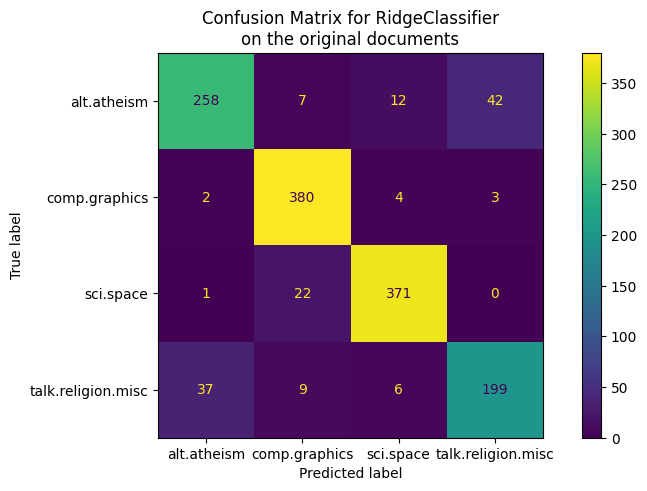

In [3]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

top 5 keywords per class:
  alt.atheism comp.graphics sci.space talk.religion.misc
0       keith      graphics     space          christian
1         god    university      nasa                com
2    atheists        thanks     orbit                god
3      people          does      moon           morality
4     caltech         image    access             people


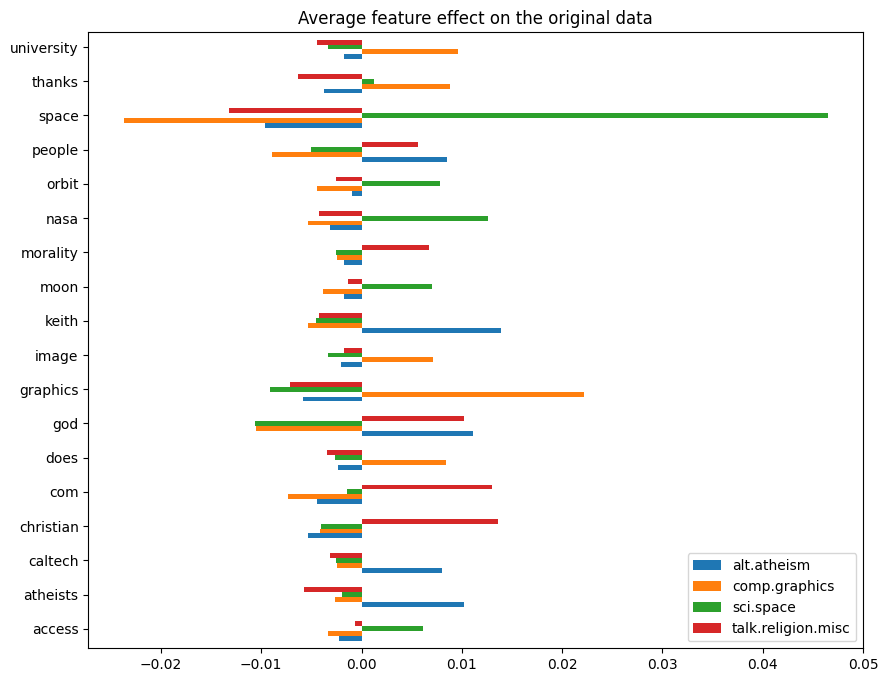

In [4]:
import numpy as np
import pandas as pd


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")